In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\u.data',sep="\t",names=['user_id','item_id','rating','ts'])
df.head()

,user_id,item_id,rating,ts
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100000 non-null  int64
 1   item_id  100000 non-null  int64
 2   rating   100000 non-null  int64
 3   ts       100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
df.describe(include='all')

,user_id,item_id,rating,ts
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [6]:
cols="item_id |title | release date | video release date |IMDb URL | unknown | Action | Adventure | Animation |Children's | Comedy | Crime | Documentary | Drama | Fantasy |Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |Thriller | War | Western |".split('|')
movies=pd.read_csv(r'C:\Users\Dell\Downloads\u.item',sep='|',names=cols)
movies.head()

,item_id,title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,NaN
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,NaN
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN


In [7]:
df[['item_id']]

,item_id
0,242
1,302
2,377
3,51
4,346
...,...
99995,476
99996,204
99997,1090
99998,225


In [8]:
movies.columns = movies.columns.str.strip()
movies[['item_id' ,'title']]

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [9]:
data=pd.merge(df.drop('ts',axis=1),movies[['item_id','title']],on='item_id')
data.head()

,user_id,item_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  100000 non-null  int64 
 1   item_id  100000 non-null  int64 
 2   rating   100000 non-null  int64 
 3   title    100000 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.8+ MB


In [11]:
data.describe()

,user_id,item_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [12]:
data['title'].nunique()

1664

In [13]:
data['user_id'].nunique()

943

In [14]:
movies=data['title'].unique()
for m in movies:
    print(m,data['rating'][data['title']==m].mean())

Kolya (1996) 3.9914529914529915
L.A. Confidential (1997) 4.161616161616162
Heavyweights (1994) 2.1538461538461537
Legends of the Fall (1994) 3.45679012345679
Jackie Brown (1997) 3.642857142857143
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) 4.252577319587629
Hunt for Red October, The (1990) 3.8634361233480177
Jungle Book, The (1994) 3.5647058823529414
Grease (1978) 3.347058823529412
Remains of the Day, The (1993) 3.94
Men in Black (1997) 3.745874587458746
Romy and Michele's High School Reunion (1997) 3.061224489795918
Star Trek: First Contact (1996) 3.66027397260274
To Wong Foo, Thanks for Everything! Julie Newmar (1995) 2.8947368421052633
Batman Forever (1995) 2.6666666666666665
Only You (1994) 3.1538461538461537
Age of Innocence, The (1993) 3.3846153846153846
Sabrina (1995) 3.5
Just Cause (1995) 3.142857142857143
Endless Summer 2, The (1994) 2.5
Man Without a Face, The (1993) 3.5441176470588234
Sabrina (1954) 3.796875
Die Hard (1988) 3.8724279835390947


In [15]:
movies=data['title'].unique()
for m in movies:
    print(m, ' '*5,data['rating'][data['title']==m].mean())

Kolya (1996)       3.9914529914529915
L.A. Confidential (1997)       4.161616161616162
Heavyweights (1994)       2.1538461538461537
Legends of the Fall (1994)       3.45679012345679
Jackie Brown (1997)       3.642857142857143
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)       4.252577319587629
Hunt for Red October, The (1990)       3.8634361233480177
Jungle Book, The (1994)       3.5647058823529414
Grease (1978)       3.347058823529412
Remains of the Day, The (1993)       3.94
Men in Black (1997)       3.745874587458746
Romy and Michele's High School Reunion (1997)       3.061224489795918
Star Trek: First Contact (1996)       3.66027397260274
To Wong Foo, Thanks for Everything! Julie Newmar (1995)       2.8947368421052633
Batman Forever (1995)       2.6666666666666665
Only You (1994)       3.1538461538461537
Age of Innocence, The (1993)       3.3846153846153846
Sabrina (1995)       3.5
Just Cause (1995)       3.142857142857143
Endless Summer 2, The (1994)

In [16]:
avg_rates=data.groupby('title')['rating'].mean()
avg_rates.head(20)

title
'Til There Was You (1997)                      2.333333
1-900 (1994)                                   2.600000
101 Dalmatians (1996)                          2.908257
12 Angry Men (1957)                            4.344000
187 (1997)                                     3.024390
2 Days in the Valley (1996)                    3.225806
20,000 Leagues Under the Sea (1954)            3.500000
2001: A Space Odyssey (1968)                   3.969112
3 Ninjas: High Noon At Mega Mountain (1998)    1.000000
39 Steps, The (1935)                           4.050847
8 1/2 (1963)                                   3.815789
8 Heads in a Duffel Bag (1997)                 3.250000
8 Seconds (1994)                               3.750000
A Chef in Love (1996)                          4.125000
Above the Rim (1994)                           3.000000
Absolute Power (1997)                          3.370079
Abyss, The (1989)                              3.589404
Ace Ventura: Pet Detective (1994)         

In [17]:
avg_rates.sort_values(ascending=False).head(20)

title
They Made Me a Criminal (1939)                            5.000000
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Saint of Fort Washington, The (1993)                      5.000000
Someone Else's America (1995)                             5.000000
Star Kid (1997)                                           5.000000
Great Day in Harlem, A (1994)                             5.000000
Aiqing wansui (1994)                                      5.000000
Santa with Muscles (1996)                                 5.000000
Prefontaine (1997)                                        5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Pather Panchali (1955)                                    4.625000
Some Mother's Son (1996)                                  4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Anna (1996)                                               4.500000
Everest (1998)                                          

In [18]:
rate_count=data.groupby('title')['rating'].count()
rate_count.head(20)

title
'Til There Was You (1997)                        9
1-900 (1994)                                     5
101 Dalmatians (1996)                          109
12 Angry Men (1957)                            125
187 (1997)                                      41
2 Days in the Valley (1996)                     93
20,000 Leagues Under the Sea (1954)             72
2001: A Space Odyssey (1968)                   259
3 Ninjas: High Noon At Mega Mountain (1998)      5
39 Steps, The (1935)                            59
8 1/2 (1963)                                    38
8 Heads in a Duffel Bag (1997)                   4
8 Seconds (1994)                                 4
A Chef in Love (1996)                            8
Above the Rim (1994)                             5
Absolute Power (1997)                          127
Abyss, The (1989)                              151
Ace Ventura: Pet Detective (1994)              103
Ace Ventura: When Nature Calls (1995)           37
Across the Sea of Time (1

<AxesSubplot:>

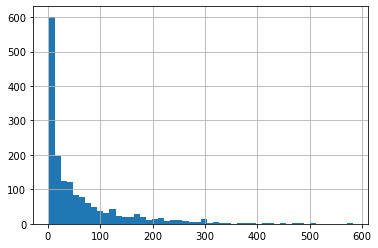

In [19]:
rate_count.hist(bins=50)

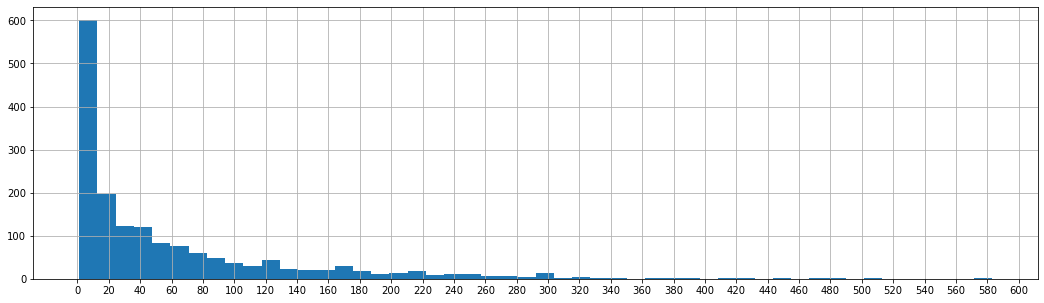

In [20]:
plt.figure(figsize=(18,5))
rate_count.hist(bins=50)
t=plt.xticks(range(0,601,20))

<AxesSubplot:>

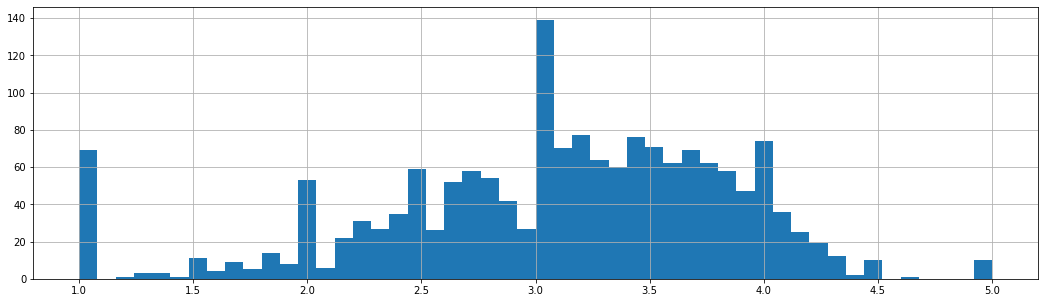

In [21]:
plt.figure(figsize=(18,5))
avg_rates.hist(bins=50)

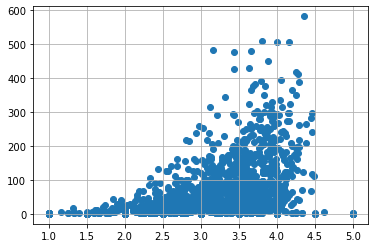

In [22]:
plt.scatter(x=avg_rates,y=rate_count)
plt.grid()

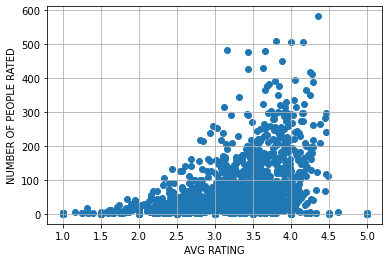

In [23]:
plt.scatter(x=avg_rates,y=rate_count)
plt.xlabel('AVG RATING')
plt.ylabel('NUMBER OF PEOPLE RATED')
plt.grid()


In [24]:
df_pivot=data.pivot_table(index='user_id',columns='title',values='rating')
df_pivot.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [25]:
inp='Star Wars (1977)'

In [26]:
df_pivot[inp].head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [40]:
inp1='1-900 (1994)'

In [41]:
df_pivot[inp1].head()

user_id
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: 1-900 (1994), dtype: float64

In [44]:
sim_inp=df_pivot.corrwith(df_pivot[inp])

In [45]:
sim_inp

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [46]:
sim_df=pd.DataFrame(sim_inp,columns=['Correlation'])
sim_df.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [47]:
sim_df.sort_values(by='Correlation',ascending=False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Wonderland (1997),NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


In [48]:
sim_df['count']=rate_count

In [53]:
sim_df.head()

,Correlation,count,avg_rate
title,,,
'Til There Was You (1997),0.872872,9,2.333333
1-900 (1994),-0.645497,5,2.600000
101 Dalmatians (1996),0.211132,109,2.908257
12 Angry Men (1957),0.184289,125,4.344000
187 (1997),0.027398,41,3.024390


In [55]:
sim_df['count']=rate_count

In [59]:
sim_df.sort_values('Correlation',ascending=False).head(20)

,Correlation,count,avg_rate
title,,,
Hollow Reed (1996),1.0,6,2.333333
Commandments (1997),1.0,3,2.666667
Cosi (1996),1.0,4,4.000000
No Escape (1994),1.0,5,2.400000
Stripes (1981),1.0,5,3.800000
Star Wars (1977),1.0,583,4.358491
Man of the Year (1995),1.0,9,3.111111
"Beans of Egypt, Maine, The (1994)",1.0,2,3.500000
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5,2.600000


In [50]:
sim_df['avg_rate']=avg_rates

In [57]:
sim_df.head()

,Correlation,count,avg_rate
title,,,
'Til There Was You (1997),0.872872,9,2.333333
1-900 (1994),-0.645497,5,2.600000
101 Dalmatians (1996),0.211132,109,2.908257
12 Angry Men (1957),0.184289,125,4.344000
187 (1997),0.027398,41,3.024390


In [52]:
sim_df[(sim_df['count']>100)].sort_values('Correlation',ascending=False).head(10)

,Correlation,count,avg_rate
title,,,
Star Wars (1977),1.000000,583,4.358491
"Empire Strikes Back, The (1980)",0.747981,367,4.204360
Return of the Jedi (1983),0.672556,507,4.007890
Raiders of the Lost Ark (1981),0.536117,420,4.252381
Austin Powers: International Man of Mystery (1997),0.377433,130,3.246154
"Sting, The (1973)",0.367538,241,4.058091
Indiana Jones and the Last Crusade (1989),0.350107,331,3.930514
Pinocchio (1940),0.347868,101,3.673267
"Frighteners, The (1996)",0.332729,115,3.234783


In [60]:
recom=sim_df[(sim_df['count']>100)].sort_values('Correlation',ascending=False)
recom.drop(inp,axis=0,inplace=True)
recommended=recom.index[:3]
for r in recommended:
    print(r)

Empire Strikes Back, The (1980)
Return of the Jedi (1983)
Raiders of the Lost Ark (1981)


In [61]:
recom.head(3)

,Correlation,count,avg_rate
title,,,
"Empire Strikes Back, The (1980)",0.747981,367,4.204360
Return of the Jedi (1983),0.672556,507,4.007890
Raiders of the Lost Ark (1981),0.536117,420,4.252381
